In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_csv('events.csv')

from datetime import datetime

df.head(10)

#print(df.timestamp)

from datetime import timedelta

#test=1433224214164
#test1=timedelta(milliseconds=test)
#print(test1)

df['new']=df['timestamp'].apply(lambda x : datetime.fromtimestamp(x/1000))

In [18]:
df

,timestamp,visitorid,event,itemid,transactionid,new,year,month,new_event,date,day,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02 06:02:12.117,2015,6,1,6-2015,2,6
1,1433224214164,992329,view,248676,NaN,2015-06-02 06:50:14.164,2015,6,1,6-2015,2,6
2,1433221999827,111016,view,318965,NaN,2015-06-02 06:13:19.827,2015,6,1,6-2015,2,6
3,1433221955914,483717,view,253185,NaN,2015-06-02 06:12:35.914,2015,6,1,6-2015,2,6
4,1433221337106,951259,view,367447,NaN,2015-06-02 06:02:17.106,2015,6,1,6-2015,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 04:13:05.939,2015,8,1,8-2015,1,4
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 04:30:13.142,2015,8,1,8-2015,1,4
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 03:57:00.527,2015,8,1,8-2015,1,3
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 04:08:50.703,2015,8,1,8-2015,1,4


In [15]:
# ici j'ai créé pour chaque colonne l'heure, le jour, le mois, l'année

df['year']=pd.to_datetime(df.new).dt.year
df['month']=pd.to_datetime(df.new).dt.month
df['day']=pd.to_datetime(df.new).dt.day
df['hour']=pd.to_datetime(df.new).dt.hour

In [4]:
df['new_event']=df['event'].replace(['view','addtocart','transaction'], value=[1,2,3])

In [19]:
df['date']=df[['day','month','year']].sort_values(by=['day','month','year']).astype(str).agg('-'.join, axis=1)

In [20]:
df['date']

0          2-6-2015
1          2-6-2015
2          2-6-2015
3          2-6-2015
4          2-6-2015
             ...   
2756096    1-8-2015
2756097    1-8-2015
2756098    1-8-2015
2756099    1-8-2015
2756100    1-8-2015
Name: date, Length: 2756101, dtype: object

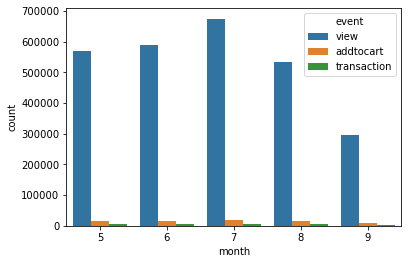

In [7]:
sns.countplot(x='month', hue='event', data=df);




In [8]:
nb_visit=df.groupby(by='event', as_index=False).agg({'visitorid' : 'count'})
print(nb_visit)

         event  visitorid
0    addtocart      69332
1  transaction      22457
2         view    2664312


In [9]:
verif=df['transactionid'].count()
print(verif)

transac_month=df.groupby(by='month', as_index=False).agg({'transactionid':'count'})
print(transac_month)

# on remarque c'est en juillet qu'il y a le plus de transaction et aussi le plus de vie

22457
   month  transactionid
0      5           4602
1      6           5041
2      7           5806
3      8           4630
4      9           2378
